In [124]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [125]:
pd.set_option('display.max_columns', None)

In [126]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Mexico = pd.read_csv("Listings Final Mexico.csv", on_bad_lines='skip')
Mexico

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,898633,https://www.airbnb.com/rooms/898633,20240627045222,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,The LOCATION is undoubtedly THE BIG advantage ...,The hipster Roma neighborhood embodies a color...,https://a0.muscache.com/pictures/ba75b1c1-cb02...,4796027,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico","I'm Marco. I am a graphic designer, but I also...",within an hour,100%,88%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Roma Norte,3,6,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Cuauhtémoc,NaN,19.420630,-99.165860,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...","$1,652.00",3,48,3,3,48,48,3.0,48.0,NaN,t,0,5,23,262,2024-06-28,56,3,0,2013-03-30,2024-04-17,4.95,4.93,4.95,4.93,4.96,4.93,4.91,NaN,f,3,2,1,0,0.41
1,35797,https://www.airbnb.com/rooms/35797,20240627045222,2024-06-27,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,NaN,1,1,"['email', 'phone', 'work_email']",t,t,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,NaN,19.382830,-99.271780,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...","$3,663.00",1,7,1,1,7,7,1.0,7.0,NaN,t,28,58,88,363,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,44616,https://www.airbnb.com/rooms/44616,20240627045222,2024-06-28,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100%,92%,t,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,17,17,"['email', 'phone', 'work_email']",t,t,NaN,Cuauhtémoc,NaN,19.411620,-99.177940,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...","$18,000.00",1,365,1,1,365,365,1.0,365.0,NaN,t,29,59,89,364,2024-06-28,64,0,0,2011-11-09,2023-03-26,4.58,4.56,4.70,4.87,4.78,4.98,4.48,NaN,f,13,4,2,0,0.42
3,913084,https://www.airbnb.com/rooms/913084,20240627045222,2024-06

In [127]:
#Convertir la variable price a numerico
Mexico['price'] = Mexico['price'].replace('[\$,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\1008147510.py:2: SyntaxWarning: invalid escape sequence '\$'
  Mexico['price'] = Mexico['price'].replace('[\$,]', '', regex=True).astype(float)


In [128]:
Mexico['host_acceptance_rate'] = Mexico['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\%'
<>:1: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\2093985810.py:1: SyntaxWarning: invalid escape sequence '\%'
  Mexico['host_acceptance_rate'] = Mexico['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)


In [129]:
Mexico['host_total_listings_count'] = Mexico['host_total_listings_count'].astype(float)

In [130]:
#Convertir la host_response_rate price a numerico
Mexico['host_response_rate'] = Mexico['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\%'
<>:2: SyntaxWarning: invalid escape sequence '\%'
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\1757207178.py:2: SyntaxWarning: invalid escape sequence '\%'
  Mexico['host_response_rate'] = Mexico['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)


In [131]:
#Identificar valores nulos por columna
Valores_Nulos= Mexico.isnull().sum()
Columnas_Con_Nulos = Valores_Nulos[Valores_Nulos > 0]
Columnas_Con_Nulos

description                       951
neighborhood_overview           10290
host_location                    5606
host_about                      11182
host_response_time               4197
host_response_rate               4197
host_acceptance_rate             2855
host_is_superhost                1543
host_neighbourhood              13355
neighbourhood                   10290
neighbourhood_group_cleansed    26536
bathrooms                        3129
bathrooms_text                     25
bedrooms                         1071
beds                             3164
price                            3198
calendar_updated                26536
has_availability                 1036
first_review                     3872
last_review                      3872
review_scores_rating             3872
review_scores_accuracy           3887
review_scores_cleanliness        3888
review_scores_checkin            3887
review_scores_communication      3887
review_scores_location           3887
review_score

In [132]:
#Información tipos de columnas
Tipos_Columnas = Mexico[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'object']
Columnas_Object

description              object
neighborhood_overview    object
host_location            object
host_about               object
host_response_time       object
host_is_superhost        object
host_neighbourhood       object
neighbourhood            object
bathrooms_text           object
has_availability         object
first_review             object
last_review              object
dtype: object

In [133]:
#Información tipos de columnas
Tipos_Columnas = Mexico[Columnas_Con_Nulos.index].dtypes
Columnas_Object = Tipos_Columnas[Tipos_Columnas == 'float']
Columnas_Object

host_response_rate              float64
host_acceptance_rate            float64
neighbourhood_group_cleansed    float64
bathrooms                       float64
bedrooms                        float64
beds                            float64
price                           float64
calendar_updated                float64
review_scores_rating            float64
review_scores_accuracy          float64
review_scores_cleanliness       float64
review_scores_checkin           float64
review_scores_communication     float64
review_scores_location          float64
review_scores_value             float64
license                         float64
reviews_per_month               float64
dtype: object

In [134]:
#Realizamos una copia del dataframe
copia_Mexico = Mexico.copy()

In [135]:
#Sustituir valores nulos por un string en  concreto
copia_Mexico["description"] = copia_Mexico["description"].fillna("DESCRIPCIÓN FALTANTE")
copia_Mexico["neighborhood_overview"] = copia_Mexico["neighborhood_overview"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_name"] = copia_Mexico["host_name"].fillna("ANONIMO")
copia_Mexico["host_location"] = copia_Mexico["host_location"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_about"] = copia_Mexico["host_about"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_response_time"] = copia_Mexico["host_response_time"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_is_superhost"] = copia_Mexico["host_is_superhost"].fillna("VALIDACIÓN PENDIENTE")
copia_Mexico["host_neighbourhood"] = copia_Mexico["host_neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Mexico["host_verifications"] = copia_Mexico["host_verifications"].fillna("VALIDACIÓN PENDIENTE")
copia_Mexico["host_identity_verified"] = copia_Mexico["host_identity_verified"].fillna("VALIDACIÓN PENDIENTE")
copia_Mexico["neighbourhood"] = copia_Mexico["neighbourhood"].fillna("SIN INFORMACIÓN")
copia_Mexico["neighbourhood_group_cleansed"] = copia_Mexico["neighbourhood_group_cleansed"].fillna("SIN INFORMACIÓN")
copia_Mexico["room_type"] = copia_Mexico["room_type"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["accommodates"] = copia_Mexico["accommodates"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["bathrooms"] = copia_Mexico["bathrooms"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["bathrooms_text"] = copia_Mexico["bathrooms_text"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["amenities"] = copia_Mexico["amenities"].fillna("INFORMACIÓN FALTANTE")
copia_Mexico["maximum_nights"] = copia_Mexico["maximum_nights"].fillna("NO DEFINIDO")
copia_Mexico["minimum_minimum_nights"] = copia_Mexico["minimum_minimum_nights"].fillna("NO DEFINIDO")
copia_Mexico["calendar_updated"] = copia_Mexico["calendar_updated"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["has_availability"] = copia_Mexico["has_availability"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_30"] = copia_Mexico["availability_30"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_60"] = copia_Mexico["availability_60"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_90"] = copia_Mexico["availability_90"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["availability_365"] = copia_Mexico["availability_365"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["calendar_last_scraped"] = copia_Mexico["calendar_last_scraped"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["number_of_reviews"] = copia_Mexico["number_of_reviews"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["number_of_reviews_ltm"] = copia_Mexico["number_of_reviews_ltm"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["first_review"] = copia_Mexico["first_review"].fillna("SIN RESEÑA")
copia_Mexico["last_review"] = copia_Mexico["last_review"].fillna("SIN RESEÑA")
copia_Mexico["review_scores_rating"] = copia_Mexico["review_scores_rating"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["review_scores_cleanliness"] = copia_Mexico["review_scores_cleanliness"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["review_scores_location"] = copia_Mexico["review_scores_location"].fillna("INFORMACIÓN NO DISPONIBLE")
copia_Mexico["instant_bookable"] = copia_Mexico["instant_bookable"].fillna("INFORMACIÓN NO DISPONIBLE")

In [136]:
#Sustituir valores nulos con promedio o media
copia_Mexico["host_response_rate"] = copia_Mexico["host_response_rate"].fillna(round(copia_Mexico["host_response_rate"].mean(), 1))
copia_Mexico["host_total_listings_count"] = copia_Mexico["host_total_listings_count"].fillna(round(copia_Mexico["host_response_rate"].mean(), 1))
copia_Mexico["host_acceptance_rate"] = copia_Mexico["host_acceptance_rate"].fillna(round(copia_Mexico["minimum_nights"].mean(), 1))
copia_Mexico["minimum_nights"] = copia_Mexico["minimum_nights"].fillna(round(copia_Mexico["minimum_nights"].mean(), 1))
copia_Mexico["maximum_maximum_nights"] = copia_Mexico["maximum_maximum_nights"].fillna(round(copia_Mexico["maximum_maximum_nights"].mean(), 1))
copia_Mexico["maximum_nights_avg_ntm"] = copia_Mexico["maximum_nights_avg_ntm"].fillna(round(copia_Mexico["maximum_nights_avg_ntm"].mean(), 1))
copia_Mexico["number_of_reviews_l30d"] = copia_Mexico["number_of_reviews_l30d"].fillna(round(copia_Mexico["number_of_reviews_l30d"].mean(), 1))
copia_Mexico["review_scores_accuracy"] = copia_Mexico["review_scores_accuracy"].fillna(round(copia_Mexico["review_scores_accuracy"].mean(), 1))
copia_Mexico["review_scores_checkin"] = copia_Mexico["review_scores_checkin"].fillna(round(copia_Mexico["review_scores_checkin"].mean(), 1))
copia_Mexico["price"] = copia_Mexico["price"].fillna(round(copia_Mexico["price"].mean(), 1))
copia_Mexico["review_scores_communication"] = copia_Mexico["review_scores_communication"].fillna(round(copia_Mexico["review_scores_communication"].mean(), 1))
copia_Mexico["review_scores_value"] = copia_Mexico["review_scores_value"].fillna(round(copia_Mexico["review_scores_value"].mean(), 1))
copia_Mexico["calculated_host_listings_count"] = copia_Mexico["calculated_host_listings_count"].fillna(round(copia_Mexico["calculated_host_listings_count"].mean(), 1))
copia_Mexico["calculated_host_listings_count_entire_homes"] = copia_Mexico["calculated_host_listings_count_entire_homes"].fillna(round(copia_Mexico["calculated_host_listings_count_entire_homes"].mean(), 1))
copia_Mexico["calculated_host_listings_count_private_rooms"] = copia_Mexico["calculated_host_listings_count_private_rooms"].fillna(round(copia_Mexico["calculated_host_listings_count_private_rooms"].mean(), 1))
copia_Mexico["calculated_host_listings_count_shared_rooms"] = copia_Mexico["calculated_host_listings_count_shared_rooms"].fillna(round(copia_Mexico["calculated_host_listings_count_shared_rooms"].mean(), 1))
copia_Mexico["reviews_per_month"] = copia_Mexico["reviews_per_month"].fillna(round(copia_Mexico["reviews_per_month"].mean(), 1))

In [137]:
#Sustituir valores nulos por un valor numérico en  concreto
copia_Mexico["beds"]=copia_Mexico["beds"].fillna("-")
copia_Mexico["bedrooms"] = copia_Mexico["bedrooms"].fillna("-")
copia_Mexico["license"]=copia_Mexico["license"].fillna("0")

In [138]:
#Corroboramos valores nulos
# Ajustar maximo de filas
valores_nulos=copia_Mexico.isnull().sum()
valores_nulos

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
source                                          0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 75, dtype: int64

In [139]:
#Seleccionar variables relevantes
Mexico_variables = copia_Mexico[['listing_url', 'host_total_listings_count', 'last_scraped', 'source', 'name', 'host_url', 'host_name', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']]

In [140]:
Mexico_variables.head()

,listing_url,host_total_listings_count,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/898633,6.0,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,100.0,88.0,t,Roma Norte,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",1652.0,t,56,4.95,f,3,0.41
1,https://www.airbnb.com/rooms/35797,1.0,2024-06-27,city scrape,Villa Dante,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,0.0,4.7,f,SIN INFORMACIÓN,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,Entire villa,Entire home/apt,2,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",3663.0,t,0,INFORMACIÓN NO DISPONIBLE,f,1,1.70
2,https://www.airbnb.com/rooms/44616,17.0,2024-06-28,city scrape,CONDESA HAUS B&B,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,100.0,92.0,t,Condesa,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,Entire home,Entire home/apt,14,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",18000.0,t,64,4.58,f,13,0.42
3,https://www.airbnb.com/rooms/913084,4.0,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,https://www.airbnb.com/users/show/4647293,Martina,2013-01-09,"Mexico City, Mexico",within an hour,100.0,96.0,t,SIN INFORMACIÓN,"['email', 'phone']",t,t,Miguel Hidalgo,Entire serviced apartment,Entire home/apt,4,1 bath,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",814.0,t,161,4.75,t,1,1.19
4,https://www.airbnb.com/rooms/67703,4.0,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,89.0,62.0,t,Hipódromo,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,4,1 bath,2.0,2.0,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",1923.0,t,49,4.9,f,2,0.32


ELIMINAR OUTLIERS POR DESVIACION ESTANDAR

In [141]:
Mexico_variables.dtypes

listing_url                        object
host_total_listings_count         float64
last_scraped                       object
source                             object
name                               object
host_url                           object
host_name                          object
host_since                         object
host_location                      object
host_response_time                 object
host_response_rate                float64
host_acceptance_rate              float64
host_is_superhost                  object
host_neighbourhood                 object
host_verifications                 object
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms_text                     object
bedrooms                           object
beds                              

In [142]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = Mexico_variables.select_dtypes(include = 'object')
columnas_cuantitativas = Mexico_variables.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

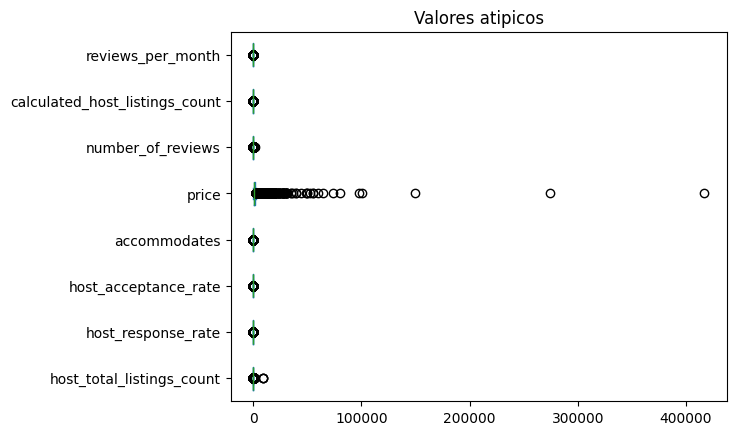

In [143]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [144]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido host_total_listings_count           488.576569
host_response_rate                  145.228131
host_acceptance_rate                183.506070
accommodates                         10.367106
price                             13214.172810
number_of_reviews                   262.987146
calculated_host_listings_count      147.053524
reviews_per_month                     6.989101
dtype: float64
Limite inferior permitido host_total_listings_count          -415.153144
host_response_rate                   43.400984
host_acceptance_rate                -22.236964
accommodates                         -3.685316
price                            -10260.222856
number_of_reviews                  -176.087990
calculated_host_listings_count     -112.690847
reviews_per_month                    -3.589922
dtype: float64


In [145]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [146]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

host_total_listings_count         415
host_response_rate                821
host_acceptance_rate                0
accommodates                      500
price                             130
number_of_reviews                 611
calculated_host_listings_count    718
reviews_per_month                 389
dtype: int64

In [147]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

In [148]:
#Se juntan las columnas cualitativas con las cuantitativas
Mexico_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Mexico_outliers.head()

,host_total_listings_count,host_response_rate,host_acceptance_rate,accommodates,price,number_of_reviews,calculated_host_listings_count,reviews_per_month,listing_url,last_scraped,source,name,host_url,host_name,host_since,host_location,host_response_time,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms_text,bedrooms,beds,amenities,has_availability,review_scores_rating,instant_bookable
0,6.0,100.0,88.0,2.0,1652.0,56.0,3.0,0.41,https://www.airbnb.com/rooms/898633,2024-06-28,city scrape,City SkyLine View from 1 Bedroom Apt in CDMX,https://www.airbnb.com/users/show/4796027,Marco,2013-01-21,"Mexico City, Mexico",within an hour,t,Roma Norte,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,1.0,2.0,"[""40 inch HDTV with Amazon Prime Video, Netfli...",t,4.95,f
1,1.0,97.1,4.7,2.0,3663.0,0.0,1.0,1.70,https://www.airbnb.com/rooms/35797,2024-06-27,city scrape,Villa Dante,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico",a few days or more,f,SIN INFORMACIÓN,"['email', 'phone', 'work_email']",t,t,Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,1.0,1.0,"[""Hot water"", ""Washer"", ""Bed linens"", ""Wifi"", ...",t,INFORMACIÓN NO DISPONIBLE,f
2,17.0,100.0,92.0,3.1,1333.4,64.0,13.0,0.42,https://www.airbnb.com/rooms/44616,2024-06-28,city scrape,CONDESA HAUS B&B,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",within an hour,t,Condesa,"['email', 'phone', 'work_email']",t,t,Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,5.0,8.0,"[""Wifi"", ""Coffee maker: Nespresso"", ""Host gree...",t,4.58,f
3,4.0,100.0,96.0,4.0,814.0,161.0,1.0,1.19,https://www.airbnb.com/rooms/913084,2024-06-28,city scrape,15 blocks from Paseo de la Reforma,https://www.airbnb.com/users/show/4647293,Martina,2013-01-09,"Mexico City, Mexico",within an hour,t,SIN INFORMACIÓN,"['email', 'phone']",t,t,Miguel Hidalgo,Entire serviced apartment,Entire home/apt,1 bath,2.0,3.0,"[""Wifi"", ""Host greets you"", ""Coffee maker"", ""S...",t,4.75,t
4,4.0,89.0,62.0,4.0,1923.0,49.0,2.0,0.32,https://www.airbnb.com/rooms/67703,2024-06-28,city scrape,"2 bedroom apt. deco bldg, Condesa",https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico",within a day,t,Hipódromo,"['email', 'phone']",t,t,Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,2.0,2.0,"[""Wifi"", ""Coffee maker"", ""Sound system"", ""Clot...",t,4.9,f


In [149]:
#Comprobamos que no existan valores nulos
valores_nulos_Mexico_outliers = Mexico_outliers.isnull().sum()
valores_nulos_Mexico_outliers

host_total_listings_count         0
host_response_rate                0
host_acceptance_rate              0
accommodates                      0
price                             0
number_of_reviews                 0
calculated_host_listings_count    0
reviews_per_month                 0
listing_url                       0
last_scraped                      0
source                            0
name                              0
host_url                          0
host_name                         0
host_since                        0
host_location                     0
host_response_time                0
host_is_superhost                 0
host_neighbourhood                0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
bathrooms_text                    0
bedrooms                          0
beds                        

In [150]:
Mexico_outliers.to_csv('Mexico sin outliers.csv', index=False)

REGRESION LOGISTICA

In [151]:
Mexico_outliers['bedrooms'] = pd.to_numeric(Mexico_outliers['bedrooms'], errors='coerce')
Mexico_outliers['beds'] = pd.to_numeric(Mexico_outliers['beds'], errors='coerce')


In [152]:
Mexico_outliers =Mexico_outliers .fillna(method="bfill")
Mexico_outliers =Mexico_outliers .fillna(method="ffill")

C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\1774889842.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers .fillna(method="bfill")
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\1774889842.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers .fillna(method="ffill")


In [153]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Mexico_outliers[['bedrooms', 'beds','accommodates']]
Var_Dep= Mexico_outliers['host_is_superhost']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

algoritmo.fit(X_train, y_train)

LogisticRegression()

In [154]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['f', 't', 'f', ..., 'f', 'f', 'f'], dtype=object)

In [155]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[   0  434   50]
 [   0 4198  283]
 [   0 2705  291]]


In [156]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average = None, pos_label = "t")
print('Precisión del modelo')
print(precision)

Precisión del modelo
[0.         0.57216846 0.46634615]


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [157]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud)

Exactitud del modelo
0.5638738851903027


In [158]:
from sklearn.metrics import recall_score
sensibilidad = recall_score(y_test, y_pred, average="micro", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.5638738851903027


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [159]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="micro", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.5638738851903027


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [160]:
# 1
Vars_Indep1= Mexico_outliers[['bedrooms', 'beds', 'accommodates']]
Var_Dep1= Mexico_outliers['host_has_profile_pic']

# 2
Vars_Indep2= Mexico_outliers[['bedrooms', 'beds', 'accommodates']]
Var_Dep2= Mexico_outliers['host_identity_verified']

# 3
Vars_Indep3= Mexico_outliers[['bedrooms', 'beds', 'accommodates']]
Var_Dep3= Mexico_outliers['has_availability']

# 4
Vars_Indep4= Mexico_outliers[['bedrooms', 'beds', 'accommodates']]
Var_Dep4= Mexico_outliers['instant_bookable']

In [161]:
# 1
X1 = Vars_Indep1
y1 = Var_Dep1

# 2
X2 = Vars_Indep2
y2 = Var_Dep2

# 3
X3 = Vars_Indep3
y3 = Var_Dep3

# 4
X4 = Vars_Indep4
y4 = Var_Dep4

In [162]:
# 1
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state =None)

# 2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state =None)

# 3
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state =None)

# 4
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state =None)

In [163]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
escalar1 = StandardScaler()
escalar2 = StandardScaler()
escalar3 = StandardScaler()
escalar4 = StandardScaler()

In [164]:
# 1
X_train1 = escalar1.fit_transform(X_train1)
X_test1 = escalar1.transform(X_test1)

# 2
X_train2 = escalar2.fit_transform(X_train2)
X_test2 = escalar2.transform(X_test2)

# 3
X_train3 = escalar3.fit_transform(X_train3)
X_test3 = escalar3.transform(X_test3)

# 4
X_train4 = escalar4.fit_transform(X_train4)
X_test4 = escalar4.transform(X_test4)

In [165]:
algoritmo1 = LogisticRegression()
algoritmo2 = LogisticRegression()
algoritmo3 = LogisticRegression()
algoritmo4 = LogisticRegression()

In [166]:
algoritmo1.fit(X_train1, y_train1)
algoritmo2.fit(X_train2, y_train2)
algoritmo3.fit(X_train3, y_train3)
algoritmo4.fit(X_train4, y_train4)

LogisticRegression()

In [167]:
#Realizamos una predicción
y_pred1 = algoritmo1.predict(X_test1)
y_pred1

array(['t', 't', 't', ..., 't', 't', 't'], dtype=object)

In [168]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz1 = confusion_matrix(y_test1, y_pred1)
print('Matriz de Confusión')
print(matriz1)

Matriz de Confusión
[[   0  153]
 [   0 7808]]


In [169]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision1 = precision_score(y_test1, y_pred1, average = "binary", pos_label = "t")
print('Precisión del modelo')
print(precision1)

Precisión del modelo
0.9807813088807938


In [170]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud1 = accuracy_score(y_test1, y_pred1)
print('Exactitud del modelo')
print(exactitud1)

Exactitud del modelo
0.9807813088807938


In [171]:
from sklearn.metrics import recall_score
sensibilidad1 = recall_score(y_test1, y_pred1, average="binary", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad1)

Sensibilidad del modelo:
1.0


In [172]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1_1 = f1_score(y_test1, y_pred1, average="binary", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef1_1)

Puntaje F1 del modelo:
0.9902974189866193


In [173]:
#Realizamos una predicción
y_pred2 = algoritmo2.predict(X_test2)
y_pred2

array(['t', 't', 't', ..., 't', 't', 't'], dtype=object)

In [174]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz2 = confusion_matrix(y_test2, y_pred2)
print('Matriz de Confusión')
print(matriz2)

Matriz de Confusión
[[   0  335]
 [   2 7624]]


In [175]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision2 = precision_score(y_test2, y_pred2, average = "binary", pos_label = "t")
print('Precisión del modelo')
print(precision2)

Precisión del modelo
0.9579092850860661


In [176]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud2 = accuracy_score(y_test2, y_pred2)
print('Exactitud del modelo')
print(exactitud2)

Exactitud del modelo
0.957668634593644


In [177]:
from sklearn.metrics import recall_score
sensibilidad2 = recall_score(y_test2, y_pred2, average="binary", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad2)

Sensibilidad del modelo:
0.999737739312877


In [178]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1_2 = f1_score(y_test2, y_pred2, average="binary", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef1_2)

Puntaje F1 del modelo:
0.9783766442091755


In [179]:
#Realizamos una predicción
y_pred3 = algoritmo3.predict(X_test3)
y_pred3

array(['t', 't', 't', ..., 't', 't', 't'], dtype=object)

In [180]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz3 = confusion_matrix(y_test3, y_pred3)
print('Matriz de Confusión')
print(matriz3)

Matriz de Confusión
[[   0    0  321]
 [   0    0    8]
 [   1    0 7631]]


In [181]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision3 = precision_score(y_test3, y_pred3, average = "micro", pos_label = "t")
print('Precisión del modelo')
print(precision3)

Precisión del modelo
0.9585479211154377


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [182]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud3 = accuracy_score(y_test3, y_pred3)
print('Exactitud del modelo')
print(exactitud3)

Exactitud del modelo
0.9585479211154377


In [183]:
from sklearn.metrics import recall_score
sensibilidad3 = recall_score(y_test3, y_pred3, average="micro", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad3)

Sensibilidad del modelo:
0.9585479211154377


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [184]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1_3 = f1_score(y_test3, y_pred3, average="micro", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef1_3)

Puntaje F1 del modelo:
0.9585479211154377


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [185]:
#Realizamos una predicción
y_pred4 = algoritmo4.predict(X_test4)
y_pred4

array(['f', 'f', 'f', ..., 'f', 'f', 'f'], dtype=object)

In [186]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz4 = confusion_matrix(y_test4, y_pred4)
print('Matriz de Confusión')
print(matriz4)

Matriz de Confusión
[[4743   60]
 [3103   55]]


In [187]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision4 = precision_score(y_test4, y_pred4, average = "binary", pos_label = "t")
print('Precisión del modelo')
print(precision4)

Precisión del modelo
0.4782608695652174


In [188]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud4 = accuracy_score(y_test4, y_pred4)
print('Exactitud del modelo')
print(exactitud4)

Exactitud del modelo
0.6026881045094837


In [189]:
from sklearn.metrics import recall_score
sensibilidad4 = recall_score(y_test4, y_pred4, average="binary", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad4)

Sensibilidad del modelo:
0.01741608613046232


In [190]:
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1_4 = f1_score(y_test4, y_pred4, average="binary", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef1_4)

Puntaje F1 del modelo:
0.03360831041857623


In [191]:
data = {'Correlación': ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable'],
        'Precisión': [precision, precision1, precision2, precision3, precision4],
        'Exactitud': [exactitud, exactitud1, exactitud2, exactitud3, exactitud4],
        'Sensibilidad': [sensibilidad, sensibilidad1, sensibilidad2, sensibilidad3, sensibilidad4]}

df_resultados = pd.DataFrame(data)

print(df_resultados)

              Correlación                                       Precisión  \
0       host_is_superhost  [0.0, 0.5721684612239335, 0.46634615384615385]   
1    host_has_profile_pic                                        0.980781   
2  host_identity_verified                                        0.957909   
3        has_availability                                        0.958548   
4        instant_bookable                                        0.478261   

   Exactitud  Sensibilidad  
0   0.563874      0.563874  
1   0.980781      1.000000  
2   0.957669      0.999738  
3   0.958548      0.958548  
4   0.602688      0.017416  


VARIABLES NUMERICAS A DICOTOMICAS

PRICE

In [192]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max1=Mexico_outliers['price'].max()
Min1=Mexico_outliers['price'].min()
Limites1= [Min1, Max1]
Limites1

[105.0, 12991.0]

In [193]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(105.0, 12991.0, 3)
intervalos

array([  105.,  6548., 12991.])

In [194]:
#Creamos las categorías 
categorias= ["Precio bajo", "Precio alto"]

In [195]:
#Finalmente creamos las categorías en la columna numérica
Mexico_outliers['price']=pd.cut(x= Mexico_outliers['price'], bins=intervalos, labels= categorias )

In [196]:
Mexico_outliers['price']

0        Precio bajo
1        Precio bajo
2        Precio bajo
3        Precio bajo
4        Precio bajo
            ...     
26531    Precio alto
26532    Precio bajo
26533    Precio bajo
26534    Precio bajo
26535    Precio bajo
Name: price, Length: 26536, dtype: category
Categories (2, object): ['Precio bajo' < 'Precio alto']

In [197]:
Mexico_outliers =Mexico_outliers.fillna(method="bfill")
Mexico_outliers =Mexico_outliers.fillna(method="ffill")

C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="bfill")
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="ffill")


In [198]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Mexico_outliers[['bedrooms', 'beds','accommodates']]
Var_Dep= Mexico_outliers['price']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

algoritmo.fit(X_train, y_train)

LogisticRegression()

In [199]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Precio bajo', 'Precio bajo', 'Precio bajo', ..., 'Precio bajo',
       'Precio bajo', 'Precio bajo'], dtype=object)

In [200]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[   3   71]
 [   8 7879]]


In [201]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision6 = precision_score(y_test, y_pred, average = None, pos_label = "t")
print('Precisión del modelo')
print(precision6)

Precisión del modelo
[0.27272727 0.99106918]


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [202]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud6 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud6)

Exactitud del modelo
0.9900766235397563


In [203]:
from sklearn.metrics import recall_score
sensibilidad6 = recall_score(y_test, y_pred, average="micro", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad6)

Sensibilidad del modelo:
0.9900766235397563


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [204]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef16 = f1_score(y_test, y_pred, average="micro", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef16)

c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Puntaje F1 del modelo:
0.9900766235397563


NUMBER OF REVIEWS

In [205]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max2=Mexico_outliers['number_of_reviews'].max()
Min2=Mexico_outliers['number_of_reviews'].min()
Limites2= [Min2, Max2]
Limites2

[0.0, 262.0]

In [206]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(0.0, 262.0, 3)

#Creamos las categorías 
categorias= ["Pocas reviews", "Muchas reviews"]

#Finalmente creamos las categorías en la columna numérica
Mexico_outliers['number_of_reviews']=pd.cut(x= Mexico_outliers['number_of_reviews'], bins=intervalos, labels= categorias)

Mexico_outliers['number_of_reviews']

0         Pocas reviews
1                   NaN
2         Pocas reviews
3        Muchas reviews
4         Pocas reviews
              ...      
26531               NaN
26532               NaN
26533               NaN
26534               NaN
26535               NaN
Name: number_of_reviews, Length: 26536, dtype: category
Categories (2, object): ['Pocas reviews' < 'Muchas reviews']

In [207]:
Mexico_outliers =Mexico_outliers.fillna(method="bfill")
Mexico_outliers =Mexico_outliers.fillna(method="ffill")

C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="bfill")
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="ffill")


In [208]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Mexico_outliers[['bedrooms', 'beds','accommodates']]
Var_Dep= Mexico_outliers['number_of_reviews']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

algoritmo.fit(X_train, y_train)

LogisticRegression()

In [209]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Pocas reviews', 'Pocas reviews', 'Pocas reviews', ...,
       'Pocas reviews', 'Pocas reviews', 'Pocas reviews'], dtype=object)

In [210]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[   0  543]
 [   0 7418]]


In [211]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision7 = precision_score(y_test, y_pred, average = None, pos_label = "t")
print('Precisión del modelo')
print(precision7)

Precisión del modelo
[0.         0.93179249]


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [212]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud7 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud7)

Exactitud del modelo
0.9317924883808567


In [213]:
from sklearn.metrics import recall_score
sensibilidad7 = recall_score(y_test, y_pred, average="micro", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad7)

c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Sensibilidad del modelo:
0.9317924883808567


In [214]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef17 = f1_score(y_test, y_pred, average="micro", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef17)

Puntaje F1 del modelo:
0.9317924883808567


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


ACCOMMODATES

In [215]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max2=Mexico_outliers['accommodates'].max()
Min2=Mexico_outliers['accommodates'].min()
Limites3= [Min2, Max2]
Limites3

[1.0, 10.0]

In [216]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(1.0, 10.0, 3)

#Creamos las categorías 
categorias= ["Pocos huespedes", "Muchos huespedes"]

#Finalmente creamos las categorías en la columna numérica
Mexico_outliers['accommodates']=pd.cut(x= Mexico_outliers['accommodates'], bins=intervalos, labels= categorias)

Mexico_outliers['accommodates']

0        Pocos huespedes
1        Pocos huespedes
2        Pocos huespedes
3        Pocos huespedes
4        Pocos huespedes
              ...       
26531    Pocos huespedes
26532    Pocos huespedes
26533    Pocos huespedes
26534    Pocos huespedes
26535    Pocos huespedes
Name: accommodates, Length: 26536, dtype: category
Categories (2, object): ['Pocos huespedes' < 'Muchos huespedes']

In [217]:
Mexico_outliers =Mexico_outliers.fillna(method="bfill")
Mexico_outliers =Mexico_outliers.fillna(method="ffill")

C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="bfill")
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="ffill")


In [218]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Mexico_outliers[['bedrooms', 'beds','host_total_listings_count']]
Var_Dep= Mexico_outliers['accommodates']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

algoritmo.fit(X_train, y_train)

LogisticRegression()

In [219]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Pocos huespedes', 'Pocos huespedes', 'Pocos huespedes', ...,
       'Pocos huespedes', 'Pocos huespedes', 'Pocos huespedes'],
      dtype=object)

In [220]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[  51  936]
 [ 167 6807]]


In [221]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision8 = precision_score(y_test, y_pred, average = None, pos_label = "t")
print('Precisión del modelo')
print(precision8)

Precisión del modelo
[0.23394495 0.87911662]


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [222]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud8 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud8)

Exactitud del modelo
0.8614495666373572


In [223]:
from sklearn.metrics import recall_score
sensibilidad8 = recall_score(y_test, y_pred, average="micro", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad8)

Sensibilidad del modelo:
0.8614495666373572


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [224]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef18 = f1_score(y_test, y_pred, average="micro", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef18)

Puntaje F1 del modelo:
0.8614495666373572


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


HOST_ACCEPTANCE_RATE

In [225]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max2=Mexico_outliers['host_acceptance_rate'].max()
Min2=Mexico_outliers['host_acceptance_rate'].min()
Limites4= [Min2, Max2]
Limites4

[0.0, 100.0]

In [226]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(0.0, 100.0, 3)

#Creamos las categorías 
categorias= ["Porcentaje bajo", "Porcentaje alto"]

#Finalmente creamos las categorías en la columna numérica
Mexico_outliers['host_acceptance_rate']=pd.cut(x= Mexico_outliers['host_acceptance_rate'], bins=intervalos, labels= categorias)

Mexico_outliers['host_acceptance_rate']

0        Porcentaje alto
1        Porcentaje bajo
2        Porcentaje alto
3        Porcentaje alto
4        Porcentaje alto
              ...       
26531    Porcentaje alto
26532    Porcentaje alto
26533    Porcentaje alto
26534    Porcentaje alto
26535    Porcentaje alto
Name: host_acceptance_rate, Length: 26536, dtype: category
Categories (2, object): ['Porcentaje bajo' < 'Porcentaje alto']

In [227]:
Mexico_outliers =Mexico_outliers.fillna(method="bfill")
Mexico_outliers =Mexico_outliers.fillna(method="ffill")

C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="bfill")
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="ffill")


In [228]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Mexico_outliers[['bedrooms', 'beds','host_total_listings_count']]
Var_Dep= Mexico_outliers['host_acceptance_rate']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

algoritmo.fit(X_train, y_train)

LogisticRegression()

In [229]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Porcentaje alto', 'Porcentaje alto', 'Porcentaje alto', ...,
       'Porcentaje alto', 'Porcentaje alto', 'Porcentaje alto'],
      dtype=object)

In [230]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[6758    1]
 [1201    1]]


In [231]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision9 = precision_score(y_test, y_pred, average = None, pos_label = "t")
print('Precisión del modelo')
print(precision9)

Precisión del modelo
[0.84910165 0.5       ]


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [232]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud9 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud9)

Exactitud del modelo
0.8490139429719884


In [233]:
from sklearn.metrics import recall_score
sensibilidad9 = recall_score(y_test, y_pred, average="micro", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad9)

Sensibilidad del modelo:
0.8490139429719884


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [234]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef19 = f1_score(y_test, y_pred, average="micro", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef19)

c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Puntaje F1 del modelo:
0.8490139429719884


HOST_RESPONSE_RATE

In [235]:
Max5=Mexico_outliers['host_response_rate'].max()
Min5=Mexico_outliers['host_response_rate'].min()
Limites5= [Min2, Max2]
Limites5

[0.0, 100.0]

In [236]:
#Categorización de variables
#Declaramos 2 intervalos 
intervalos=np.linspace(0.0, 100.0, 3)

#Creamos las categorías 
categorias= ["Porcentaje de respuesta bajo", "Porcentaje de respuesta alto"]

#Finalmente creamos las categorías en la columna numérica
Mexico_outliers['host_response_rate']=pd.cut(x= Mexico_outliers['host_response_rate'], bins=intervalos, labels= categorias)

Mexico_outliers['host_response_rate']

0        Porcentaje de respuesta alto
1        Porcentaje de respuesta alto
2        Porcentaje de respuesta alto
3        Porcentaje de respuesta alto
4        Porcentaje de respuesta alto
                     ...             
26531    Porcentaje de respuesta alto
26532    Porcentaje de respuesta alto
26533    Porcentaje de respuesta alto
26534    Porcentaje de respuesta alto
26535    Porcentaje de respuesta alto
Name: host_response_rate, Length: 26536, dtype: category
Categories (2, object): ['Porcentaje de respuesta bajo' < 'Porcentaje de respuesta alto']

In [237]:
Mexico_outliers =Mexico_outliers.fillna(method="bfill")
Mexico_outliers =Mexico_outliers.fillna(method="ffill")

C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="bfill")
C:\Users\Osvaldo\AppData\Local\Temp\ipykernel_9908\3085971608.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Mexico_outliers =Mexico_outliers.fillna(method="ffill")


In [238]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= Mexico_outliers[['bedrooms', 'beds','host_total_listings_count']]
Var_Dep= Mexico_outliers['host_response_rate']

#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

#Se escalan todos los datos
escalar = StandardScaler()

#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

algoritmo.fit(X_train, y_train)

LogisticRegression()

In [239]:
#Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

array(['Porcentaje de respuesta alto', 'Porcentaje de respuesta alto',
       'Porcentaje de respuesta alto', ...,
       'Porcentaje de respuesta alto', 'Porcentaje de respuesta alto',
       'Porcentaje de respuesta alto'], dtype=object)

In [240]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz)

Matriz de Confusión
[[7915    0]
 [  46    0]]


In [241]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision10 = precision_score(y_test, y_pred, average = None, pos_label = "t")
print('Precisión del modelo')
print(precision10)

Precisión del modelo
[0.99422183 0.        ]


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [242]:
#Calculo de la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud10 = accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud10)

Exactitud del modelo
0.9942218314282125


In [243]:
from sklearn.metrics import recall_score
sensibilidad10 = recall_score(y_test, y_pred, average="micro", pos_label="t")
print('Sensibilidad del modelo:')
print(sensibilidad10)

Sensibilidad del modelo:
0.9942218314282125


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [244]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef110 = f1_score(y_test, y_pred, average="micro", pos_label="t")
print('Puntaje F1 del modelo:')
print(puntajef110)

Puntaje F1 del modelo:
0.9942218314282125


c:\Users\Osvaldo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1583: UserWarning: Note that pos_label (set to 't') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


TABLA RESULTADOS

In [245]:
data2 = {'Correlación': ['price', 'number_of_reviews', 'accommodates', 'has_acceptance_rate', 'host_response_rate'],
        'Precisión': [precision6, precision7, precision8, precision9, precision10],
        'Exactitud': [exactitud6, exactitud7, exactitud8, exactitud9, exactitud10],
        'Sensibilidad': [sensibilidad6, sensibilidad7, sensibilidad8, sensibilidad9, sensibilidad10]}

df_resultados2 = pd.DataFrame(data2)

print(df_resultados2)

           Correlación                                  Precisión  Exactitud  \
0                price   [0.2727272727272727, 0.9910691823899371]   0.990077   
1    number_of_reviews                  [0.0, 0.9317924883808567]   0.931792   
2         accommodates  [0.23394495412844038, 0.8791166214645486]   0.861450   
3  has_acceptance_rate                   [0.849101645935419, 0.5]   0.849014   
4   host_response_rate                  [0.9942218314282125, 0.0]   0.994222   

   Sensibilidad  
0      0.990077  
1      0.931792  
2      0.861450  
3      0.849014  
4      0.994222  
